In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
emulab_hdd_merged = pd.read_csv("./emulab_d430_10Gbps_hdd_merged_V2.csv")

In [5]:
df = emulab_hdd_merged.drop('time_stamp', axis=1)
# np.round((sum(sum((df == 0).values))) / (len(df) * len(df.columns)),3)

In [7]:
emulab_hdd_merged.shape

(13406, 119)

In [8]:
df
# len(dict(Counter(df[df.columns[len(df.columns) - 1]])))

,sender_avg_rtt_value,sender_pacing_rate,sender_cwnd_rate,sender_avg_retransmission_timeout_value,sender_byte_ack,sender_seg_out,sender_retrans,sender_ssthresh_value,sender_segs_in,sender_avg_send_value,...,receiver_read_page_md,receiver_unlink_md,receiver_avg_dsack_dups_value,receiver_avg_reord_seen,receiver_system_cpu_percent,receiver_system_memory_percent,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes,through_put,label_value
0,0.687,15594.1,463.0,201.0,152.000000,110194.0,0.0,372.0,686.0,7807.0,...,0,0,0.0,0.0,2.1,2.9,0,167772160,0.902344,91
1,0.571,15279.8,377.0,201.0,161.516411,117437.0,0.0,372.0,1051.0,7648.3,...,0,0,0.0,0.0,1.8,2.9,0,163577856,1.437500,91
2,0.356,20319.7,313.0,201.0,174.483589,126175.0,90.0,279.0,1142.0,10184.8,...,0,0,0.0,0.0,1.9,2.9,0,176160768,1.125000,91
3,0.445,15540.6,299.0,201.0,152.000000,110142.0,0.0,279.0,1038.0,7783.4,...,0,0,0.0,0.0,2.3,3.0,0,184549376,1.531250,91
4,0.667,15309.4,441.0,201.0,216.608322,157282.0,0.0,279.0,1069.0,7659.0,...,0,0,0.0,0.0,2.7,3.0,0,159383552,1.349609,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,0.115,7000.7,34.0,201.0,46.428635,34748.0,355.0,41.0,2654.0,3424.8,...,0,0,0.0,0.0,1.0,3.3,0,37748736,0.352330,109
13402,0.125,2036.7,11.0,201.0,57.936378,41672.0,502.0,9.0,3030.0,1019.4,...,0,0,0.0,0.0,1.2,3.4,0,75494168,0.494023,109
13403,0.170,6508.1,48.0,201.0,103.967911,75930.0,602.0,24.0,4014.0,3270.8,...,0,0,0.0,0.0,1.6,3.4,0,96465424,0.626607,109
13404,0.121,3238.3,17.0,201.0,62.529030,45726.0,471.0,12.0,2868.0,1627.5,...,0,0,0.0,0.0,1.2,3.4,0,67108864,0.477866,109


In [46]:
y = df.label_value
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)

(10054, 117)
(1440, 117)


In [47]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
# print(metrics.confusion_matrix(y_test, y_pred))

98.78


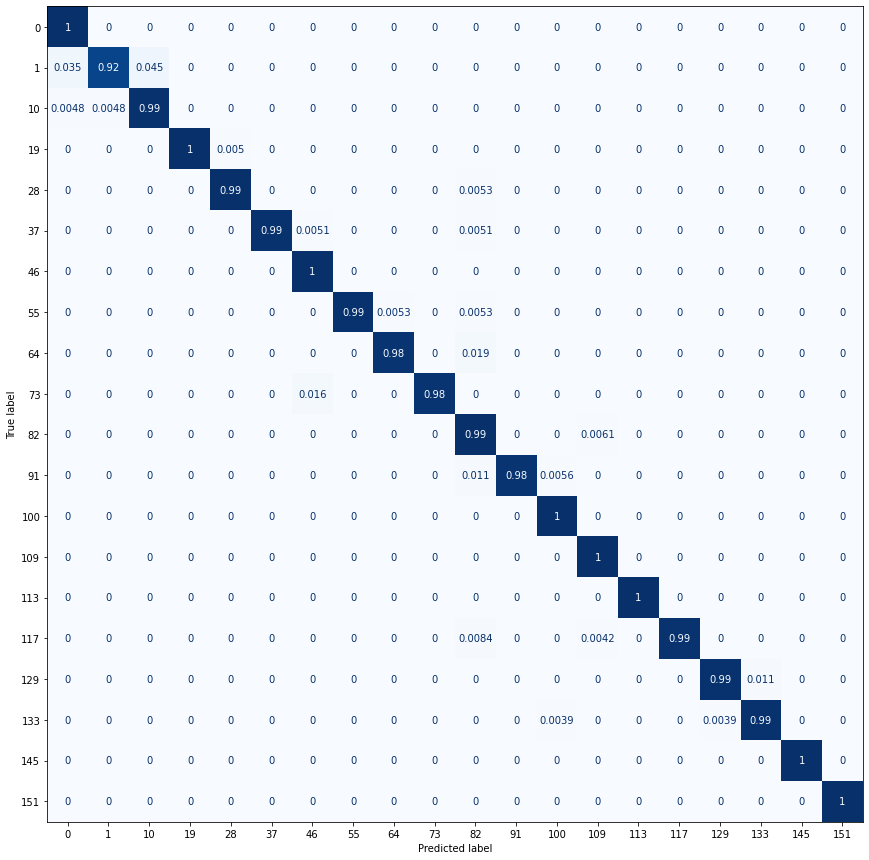

In [48]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.grid(False)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,labels=clf.classes_, normalize='true', cmap=plt.cm.Blues, ax=ax, colorbar=False)
# print(metrics.confusion_matrix(y_test, y_pred))

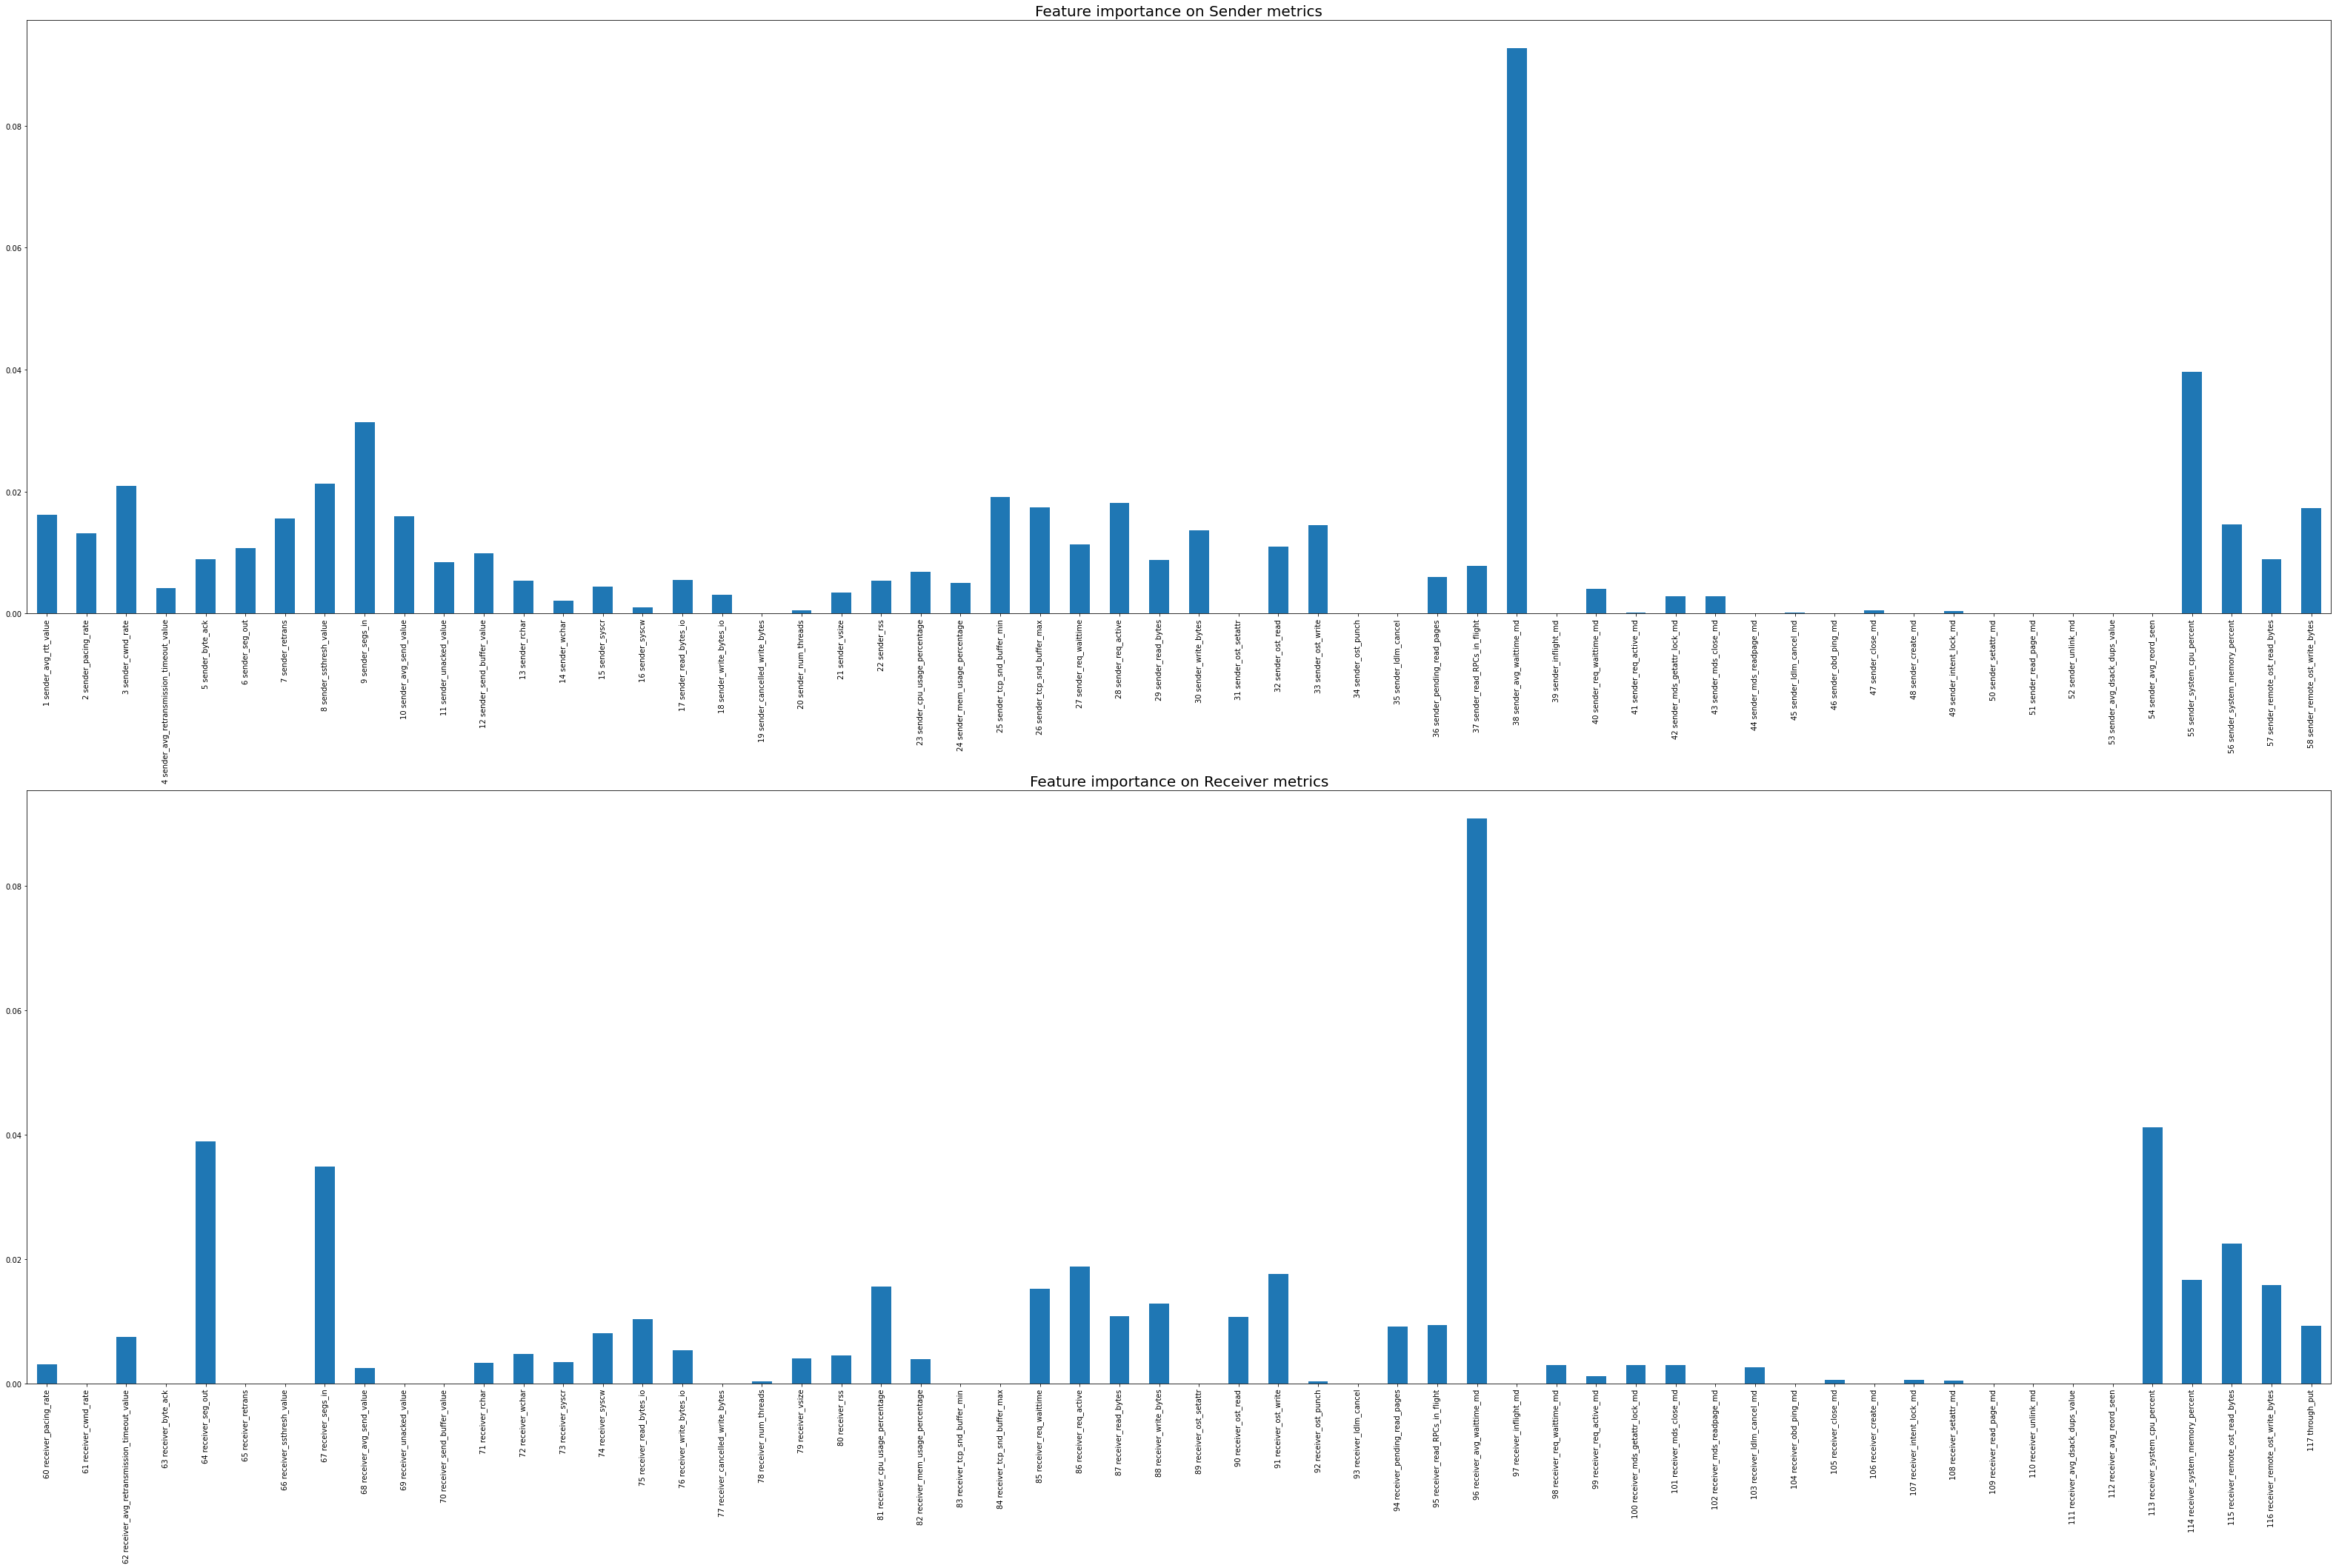

In [49]:
importance_arr = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = np.array([str(i + 1) + " " + str(j) for i, j in enumerate(df.columns[:-1])])
forest_importance = pd.Series(importance_arr, index=feature_names)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout()
# forest_importance.plot.bar(ax=ax1, grid=False)
forest_importance[0:int(len(forest_importance)/2)].plot.bar(ax=ax1, grid=False)
forest_importance[int(len(forest_importance)/2)+1:].plot.bar(ax=ax2, grid=False)
ax1.set_title("Feature importance on Sender metrics", fontsize=20)
ax2.set_title("Feature importance on Receiver metrics", fontsize=20)

fig.set_size_inches(50, 30)

In [50]:
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

Cummulative Importance Score: 
 [0.09 0.18 0.22 0.26 0.3  0.33 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5
 0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97]
Counter({0.0: 65, 0.01: 29, 0.02: 16, 0.04: 3, 0.03: 2, 0.09: 2})


In [51]:
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))

['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_cpu_usage_percentage', 'receiver_req_waittime', 'receiver_req_active', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']
23


In [52]:
y_new = df.label_value
X_new = df[features] #.drop(columns="label_value")
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)

(10054, 23)
(1420, 23)


In [53]:
clf_new = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

98.87


## TEST WITH DIFFERENT CLASSIFIRES MEREGD LEVELS

In [16]:
y = df.label_value
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)

(10054, 117)
(1320, 117)


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
classifiers = {"Random\nForest": RandomForestClassifier(n_estimators=100),
               "Decision Tree\nClassifier": DecisionTreeClassifier(),
               "SVM": svm.SVC(),
               "MLP\nNeural network": MLPClassifier(),
               "K Neighbors\nClassifier": KNeighborsClassifier(),}
classifiers_legends = list(classifiers.keys())
accuracies = np.zeros(len(classifiers_legends))
for i in range(10):
    temp_acc = np.array([])
    for key in classifiers:
        clf = classifiers[key]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
        # accuracies.append(accuracy)
        temp_acc = np.append(temp_acc, accuracy)
    accuracies = np.add(accuracies, temp_acc)
accuracies = accuracies / 10
print(classifiers_legends)
print(accuracies)

['Random\nForest', 'Decision Tree\nClassifier', 'SVM', 'MLP\nNeural network', 'K Neighbors\nClassifier']
[98.642 97.586 12.77  21.634 27.45 ]


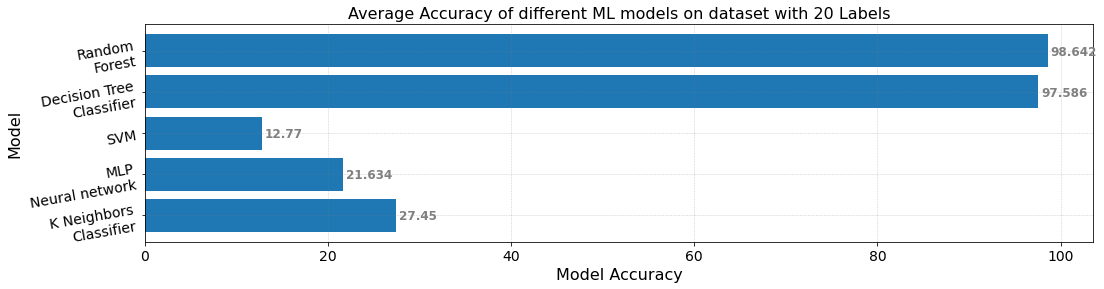

In [70]:
# Figure Size
fig, ax = plt.subplots(figsize =(17, 4))

# Horizontal Bar Plot
ax.barh(classifiers_legends, accuracies)
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.4)
ax.set_ylabel('Model', fontsize=16)
ax.set_xlabel('Model Accuracy', fontsize=16)
ax.set_yticklabels(classifiers_legends, rotation=10)
ax.set_title('Average Accuracy of different ML models on dataset with 20 Labels', fontsize=16)
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.3, i.get_y()+0.5,str(round((i.get_width()), 3)),fontsize = 12, fontweight ='bold',color ='grey')


## TEST WITH DIFFERENT CLASSIFIRES UNMERGED LEVELS

In [58]:
emulab_hdd_unmerged = pd.read_csv("./emulab_d430_10Gbps_hdd_unmerged_V2.csv")

In [59]:
df_unmerged = emulab_hdd_unmerged.drop('time_stamp', axis=1)

In [60]:
len(dict(Counter(df_unmerged[df_unmerged.columns[len(df_unmerged.columns) - 1]])))

157

In [61]:
y = df_unmerged.label_value
X = df_unmerged.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)

(10054, 117)
(7693, 117)


In [62]:
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

97.29


In [63]:
score = np.round(clf.feature_importances_, 2)
# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

Cummulative Importance Score: 
 [0.06 0.1  0.14 0.18 0.22 0.25 0.28 0.31 0.34 0.37 0.4  0.43 0.45 0.47
 0.49 0.51 0.53 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.  ]
Counter({0.0: 54, 0.01: 45, 0.03: 7, 0.02: 6, 0.04: 4, 0.06: 1})


In [66]:
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))

['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_ssthresh_value', 'sender_segs_in', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_active', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent']
18


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
classifiers_legends = []
accuracies = []
classifiers = {"Random Forest": RandomForestClassifier(n_estimators=100),
               "Decision Tree Classifier": DecisionTreeClassifier(),
               "SVM": svm.SVC(),
               "MLP Neural network": MLPClassifier(),
               "K Neighbors Classifier": KNeighborsClassifier(),}

for key in classifiers:
    clf = classifiers[key]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    classifiers_legends.append(key)
    accuracies.append(accuracy)
    print(classifiers_legends)
    print(accuracies)
print(classifiers_legends)
print(accuracies)

['Random Forest']
[97.79]
['Random Forest', 'Decision Tree Classifier']
[97.79, 95.26]
['Random Forest', 'Decision Tree Classifier', 'SVM']
[97.79, 95.26, 5.85]
['Random Forest', 'Decision Tree Classifier', 'SVM', 'MLP Neural network']
[97.79, 95.26, 5.85, 0.78]
['Random Forest', 'Decision Tree Classifier', 'SVM', 'MLP Neural network', 'K Neighbors Classifier']
[97.79, 95.26, 5.85, 0.78, 14.95]
['Random Forest', 'Decision Tree Classifier', 'SVM', 'MLP Neural network', 'K Neighbors Classifier']
[97.79, 95.26, 5.85, 0.78, 14.95]


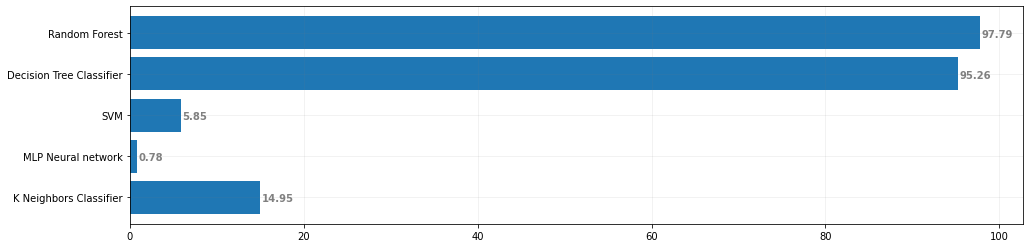

In [67]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 4))

# Horizontal Bar Plot
ax.barh(classifiers_legends, accuracies)
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

In [194]:
def grouped_to_5_cat(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})
    # # group read_congestion_by_sender_sender_ost read levels together
    #     for i in range(1, 10):
    #         aggregated_labels.update({i: 1})
    #     # group read_congestion_by_clients_on_sender_ost read levels together
    #     for i in range(10, 19):
    #         aggregated_labels.update({i: 10})
    #     # group read_congestion_by_receiver_on_receiver_ost read levels together
    #     for i in range(19, 28):
    #         aggregated_labels.update({i: 19})
    #     # group read_congestion_by_clients_on_receiver_ost read levels together
    #     for i in range(28, 37):
    #         aggregated_labels.update({i: 28})
    #     # group read_congestion_by_sender_on_other_ost read levels together
    #     for i in range(37, 46):
    #         aggregated_labels.update({i: 37})
    #     # group read_congestion_by_writer_on_other_ost read levels together
    #     for i in range(46, 55):
    #         aggregated_labels.update({i: 46})
    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [195]:
emulab_hdd_unmerged_5_cat = emulab_hdd_unmerged.copy(deep=True)
df_merged_to_5 = grouped_to_5_cat(emulab_hdd_unmerged_5_cat, 157).drop('time_stamp', axis=1)
print(df_merged_to_5.shape)
print(len(dict(Counter(df_merged_to_5[df_merged_to_5.columns[len(df_merged_to_5.columns) - 1]]))))

(13406, 118)
5


In [196]:
y = df_merged_to_5.label_value
X = df_merged_to_5.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)

(10054, 117)
(295, 117)


In [197]:
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

98.21


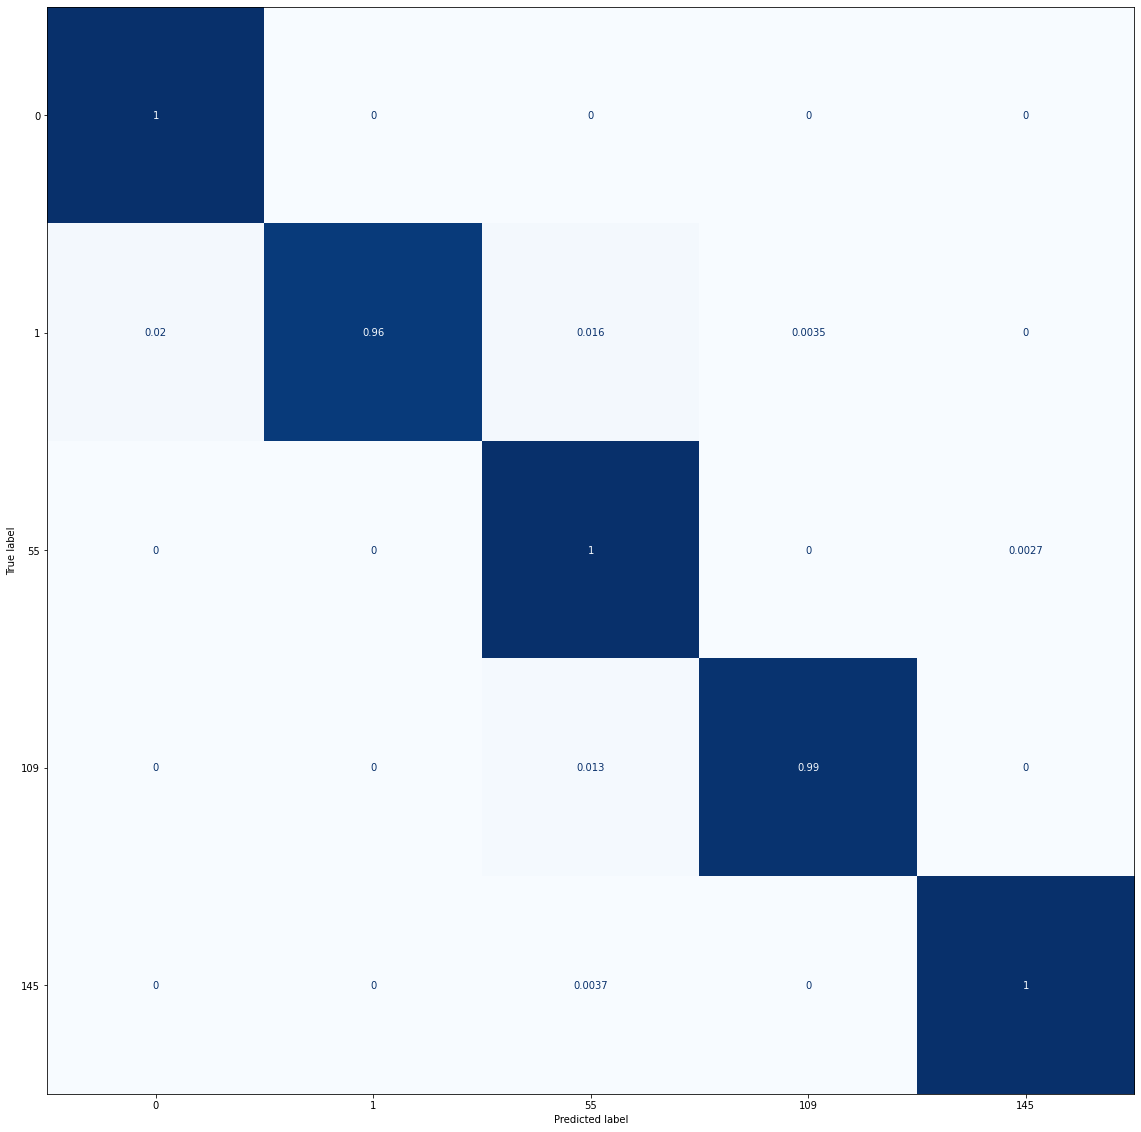

In [201]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.grid(False)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,labels=clf.classes_, normalize='true', cmap=plt.cm.Blues, ax=ax, colorbar=False)

In [199]:
score = np.round(clf.feature_importances_, 2)
# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

Cummulative Importance Score: 
 [0.17 0.3  0.35 0.39 0.43 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62
 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76
 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9
 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.02 1.02
 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02
 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02
 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02
 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02
 1.02 1.02 1.02 1.02 1.02]
Counter({0.0: 63, 0.01: 40, 0.02: 8, 0.04: 2, 0.03: 1, 0.05: 1, 0.13: 1, 0.17: 1})


In [200]:
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))

['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_cpu_usage_percentage', 'receiver_avg_waittime_md', 'receiver_remote_ost_write_bytes']
14
